### Selenium을 이용한 이미지 크롤링
- 유튜브 영상을 이미지로 크롤링 
- 특정 영역(Element)을 자르기
    - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - conda install -c anaconda pillow
    - pip install pillow
- 유튜브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정
    - 브라우져를 화면에 띄우지 않고 RAM 영역에만 띄워서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할때 사용
    
    

In [2]:
import requests
import time
import pandas as pd
from selenium import webdriver
from PIL import Image as pil
from bs4 import BeautifulSoup


#### 1. 이미지 스크린샷


In [3]:
!mkdir datas

하위 디렉터리 또는 파일 datas이(가) 이미 있습니다.


In [4]:
url = 'https://www.youtube.com/watch?v=cVEemOmHw9Y&t=120s'
driver = webdriver.Chrome()
driver.get(url)

In [5]:
# 자동플레이 안되는 경우
try: 
    driver.find_element_by_css_selector(".ytp-large-play-button.ytp-button").click()
except:
    pass

In [5]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

In [6]:
!ls datas

screenshot.png


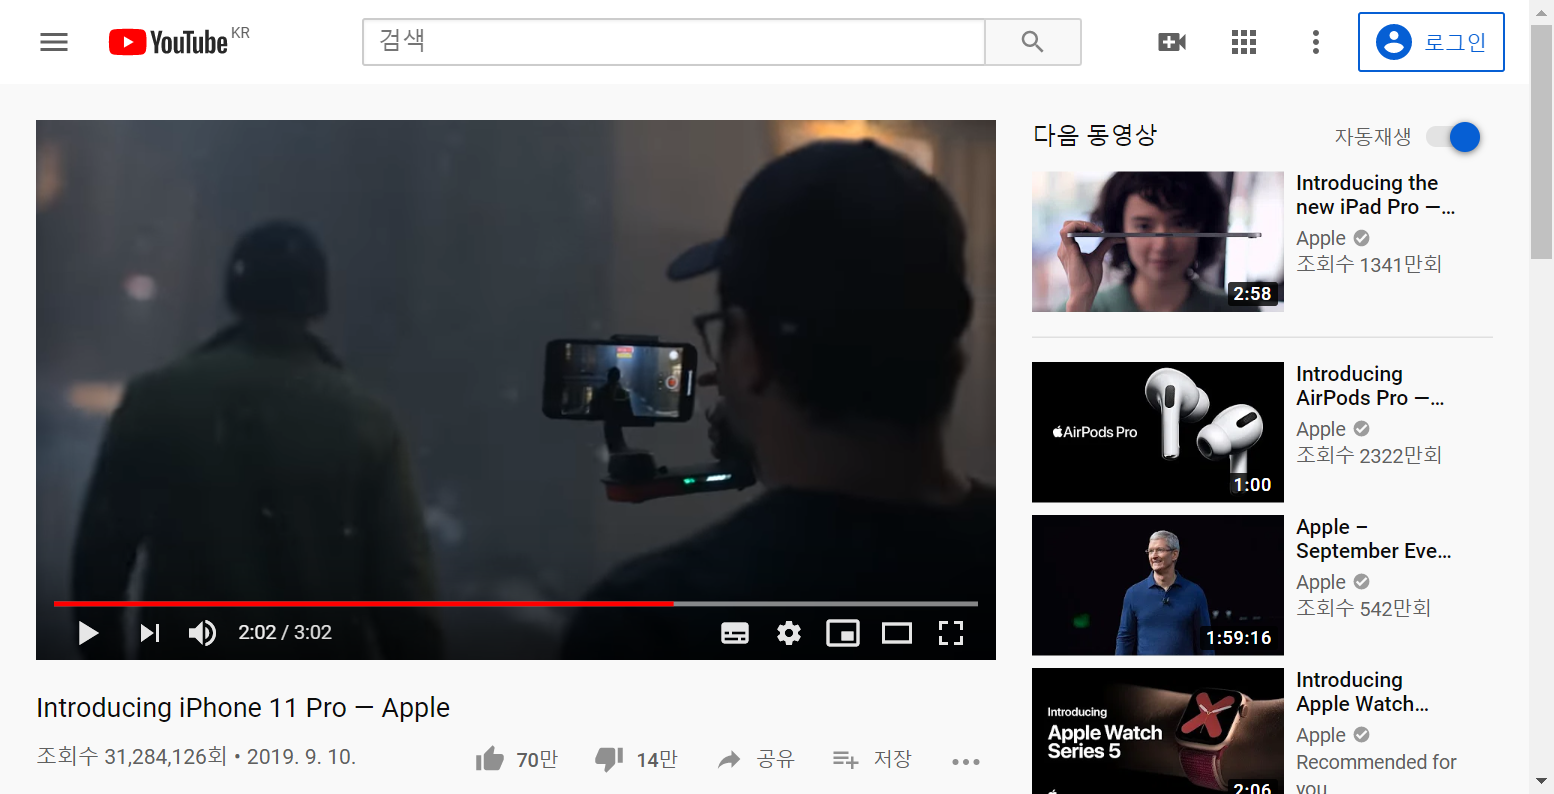

In [7]:
pil_img = pil.open("datas/screenshot.png")
pil_img

#### 2. 특정 영역의 엘리먼트 좌표값 구하기

In [9]:
driver = webdriver.Chrome()
driver.get(url)

In [11]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 240, 'width': 427}


In [31]:
#area 변경 :해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰줘야 합니다.
# 레티나 디스플레이인 경우 모든 값에 *2 하기
left = location["x"]*2.3
top = location["y"]*1.8
right = left + size["width"]*2.2
bottom = top + size["height"]*1.8
area = (left, top, right, bottom)
area

(55.199999999999996, 144.0, 994.6000000000001, 576.0)

#### 3. 이미지를 pillow로 잘라주기

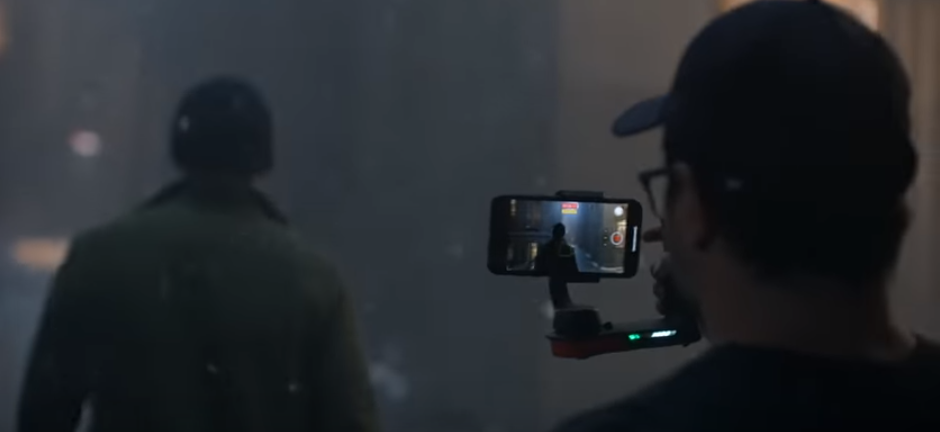

In [32]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [33]:
#이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [36]:
%ls datas

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FA75-C7E3

 C:\Code\python\crawling\datas 디렉터리

2019-11-21  오후 01:48    <DIR>          .
2019-11-21  오후 01:48    <DIR>          ..
2019-11-21  오후 01:35           414,758 screenshot.png
2019-11-21  오후 01:48           153,431 screenshot_element.png
               2개 파일             568,189 바이트
               2개 디렉터리  46,207,442,944 바이트 남음


#### 썸네일 만들기
- 원본 이미지를 다양한 사이즈로 축소하는 방법


In [37]:
pil_element_img.size


(940, 432)

(320, 147)


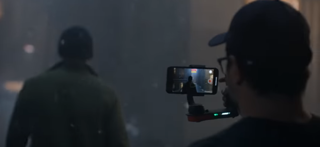

In [38]:
pil_element_img.thumbnail((320, 160))
print(pil_element_img.size)
pil_element_img

In [ ]:
# 토이프로젝트
- 동영상을 1초단위로 이미지 떠서
- 구글 vision api로 분석 (인물 -> )

#### fake useragent

In [6]:
#크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36


In [7]:
import requests
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36'

In [8]:
#user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}"".format(UserAgent().chrome)")
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=56498): Max retries exceeded with url: /session/a00903a10eb8a09c9f7476c974ba12d3/execute/sync (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000242C16F3DA0>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

#### Headless
- 브라우저를 화면에 띄우지 않고 메모리상에서만 실행하는 방법 
- 크롬 버전 60이상에서만 사용이 가능
- window화면이 지원되지 않는 환경에서 사용

In [47]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options= options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

패스트캠퍼스 | 커리어 성장을 위한 최고의 실무교육 아카데미


#### 영상 파일 다운로드
- www. -> ss로 변경하면 다운로드 받을 수 있는 사이트에 접속

In [60]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title),0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size = 1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [61]:
url= 'https://www.youtube.com/watch?v=cVEemOmHw9Y&t'

In [64]:
link = 'https://r1---sn-o0n5oxu-hxne.googlevideo.com/videoplayback?expire=1574331843&ei=YxHWXYf9CMbJogOk0ZTABg&ip=202.162.195.77&id=o-AMsj1HLS6vxK2hfzV6EBH8V0Paio60c6KtRQkB-E9yh1&itag=22&source=youtube&requiressl=yes&mm=31%2C29&mn=sn-o0n5oxu-hxne%2Csn-poqvn5u-jb3d&ms=au%2Crdu&mv=m&mvi=0&pl=24&initcwndbps=380000&mime=video%2Fmp4&ratebypass=yes&dur=182.044&lmt=1568144974157526&mt=1574310117&fvip=1&fexp=23842630%2C23860863&c=WEB&txp=5535432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cmime%2Cratebypass%2Cdur%2Clmt&sig=ALgxI2wwRgIhAK6XlZNlMQU0Irla5EJm6UDDImO9rN92GSeh9_Qvx-jJAiEArW5IAvU2FfY0bszC2n30ma5gpa09q-08cumsyMjkES0%3D&lsparams=mm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AHylml4wRAIgL-Bahe7v5K61pMNX9Z-MNoLU2mUtMe_WursyyieLUW0CIGRqzhPKuekc58Sts4h7nJ9jOqBOwiPTZ4QvA4A5OGH0&video_id=cVEemOmHw9Y&title=Introducing+iPhone+11+Pro+%E2%80%94+Apple'

In [65]:
title = "Apple.mp4 "
size = download(title, link)
print("{}MB".format(round(size/1024/1024,2)))

12.3MB
